In [22]:
#import dependencies
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [23]:
#upload csv file
file = Path('Resources/HR_Analytics_unclean.csv')

In [24]:
#read the csv file
hr_df = pd.read_csv(file)

In [25]:
#preview the dataframe:
hr_df

EmpID  Age AgeGroup Attrition     BusinessTravel  DailyRate  \
0      RM297   18    18-25       Yes      Travel_Rarely        230   
1      RM302   18    18-25        No      Travel_Rarely        812   
2      RM458   18    18-25       Yes  Travel_Frequently       1306   
3      RM728   18    18-25        No         Non-Travel        287   
4      RM829   18    18-25       Yes         Non-Travel        247   
...      ...  ...      ...       ...                ...        ...   
1475   RM412   60      55+        No      Travel_Rarely        422   
1476   RM428   60      55+        No  Travel_Frequently       1499   
1477   RM537   60      55+        No      Travel_Rarely       1179   
1478   RM880   60      55+        No      Travel_Rarely        696   
1479  RM1210   60      55+        No      Travel_Rarely        370   

                  Department  DistanceFromHome  Education EducationField  ...  \
0     Research & Development                 3          3  Life Sciences  ...   
1                      Sales                10          3        Medical  ...   
2                      Sales                 5          3      Marketing  ...   
3     Research & Development                 5          2  Life Sciences  ...   
4     Research & Development                 8          1        Medical  ...   
...                      ...               ...        ...            ...  ...   
1475  Research & Development                 7          3  Life Sciences  ...   
1476                   Sales                28          3      Marketing  ...   
1477                   Sales                16          4      Marketing  ...   
1478                   Sales                 7          4      Marketing  ...   
1479  Research & Development                 1          4        Medical  ...   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                            3             80                 0   
1                            1             80                 0   
2                            4             80                 0   
3                            4             80                 0   
4                            4             80                 0   
...                        ...            ...               ...   
1475                         4             80                 0   
1476                         4             80                 0   
1477                         4             80                 0   
1478                         2             80                 1   
1479                         3             80                 1   

     TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                    0                      2                3   
1                    0                      2                3   
2                    0                      3                3   
3                    0                      2                3   
4                    0                      0                3   
...                ...                    ...              ...   
1475                33                      5                1   
1476                22                      5                4   
1477                10                      1                3   
1478                12                      3                3   
1479                19                      2                4   

      YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0                  0                  0                        0   
1                  0                  0                        0   
2                  0                  0                        0   
3                  0                  0                        0   
4                  0                  0                        0   
...              ...                ...                      ...   
1475              29                  8                       11   
1476              18                 13            

In [26]:
#remove unnecessary columns
# Drop columns DailyRate, EmployeeCount, EmployeeNumber, Over18, RelationshipSatisfaction, StandardHours

hr_clean_df = hr_df.drop(['DailyRate', 'EmployeeCount', 'EmpID', 'Over18', 'RelationshipSatisfaction', 'StandardHours'], axis=1)
hr_clean_df

Age AgeGroup Attrition     BusinessTravel              Department  \
0      18    18-25       Yes      Travel_Rarely  Research & Development   
1      18    18-25        No      Travel_Rarely                   Sales   
2      18    18-25       Yes  Travel_Frequently                   Sales   
3      18    18-25        No         Non-Travel  Research & Development   
4      18    18-25       Yes         Non-Travel  Research & Development   
...   ...      ...       ...                ...                     ...   
1475   60      55+        No      Travel_Rarely  Research & Development   
1476   60      55+        No  Travel_Frequently                   Sales   
1477   60      55+        No      Travel_Rarely                   Sales   
1478   60      55+        No      Travel_Rarely                   Sales   
1479   60      55+        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeNumber  \
0                    3          3  Life Sciences             405   
1                   10          3        Medical             411   
2                    5          3      Marketing             614   
3                    5          2  Life Sciences            1012   
4                    8          1        Medical            1156   
...                ...        ...            ...             ...   
1475                 7          3  Life Sciences             549   
1476                28          3      Marketing             573   
1477                16          4      Marketing             732   
1478                 7          4      Marketing            1233   
1479                 1          4        Medical            1697   

      EnvironmentSatisfaction  ... PercentSalaryHike  PerformanceRating  \
0                           3  ...                13                  3   
1                           4  ...                12                  3   
2                           2  ...                14                  3   
3                           2  ...                15                  3   
4                           3  ...                12                  3   
...                       ...  ...               ...                ...   
1475                        1  ...                11                  3   
1476                        3  ...                19                  3   
1477                        1  ...                14                  3   
1478                        2  ...                18                  3   
1479                        3  ...                20                  4   

      StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  \
0                    0                  0                     2   
1                    0                  0                     2   
2                    0                  0                     3   
3                    0                  0                     2   
4                    0                  0                     0   
...                ...                ...                   ...   
1475                 0                 33                     5   
1476                 0                 22                     5   
1477                 0                 10                     1   
1478                 1                 12                     3   
1479                 1                 19                     2   

      WorkLifeBalance YearsAtCompany  YearsInCurrentRole  \
0                   3              0                   0   
1                   3              0                   0   
2                   3              0                   0   
3                   3              0                   0   
4                   3              0                   0   
...               ...            ...                 ...   
1475                1             29                   8   
1476                4             18                  13   
1477                3              2      

In [27]:
#delete duplicates
hr_clean_df = hr_clean_df.drop_duplicates()
hr_clean_df

Age AgeGroup Attrition     BusinessTravel              Department  \
0      18    18-25       Yes      Travel_Rarely  Research & Development   
1      18    18-25        No      Travel_Rarely                   Sales   
2      18    18-25       Yes  Travel_Frequently                   Sales   
3      18    18-25        No         Non-Travel  Research & Development   
4      18    18-25       Yes         Non-Travel  Research & Development   
...   ...      ...       ...                ...                     ...   
1475   60      55+        No      Travel_Rarely  Research & Development   
1476   60      55+        No  Travel_Frequently                   Sales   
1477   60      55+        No      Travel_Rarely                   Sales   
1478   60      55+        No      Travel_Rarely                   Sales   
1479   60      55+        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeNumber  \
0                    3          3  Life Sciences             405   
1                   10          3        Medical             411   
2                    5          3      Marketing             614   
3                    5          2  Life Sciences            1012   
4                    8          1        Medical            1156   
...                ...        ...            ...             ...   
1475                 7          3  Life Sciences             549   
1476                28          3      Marketing             573   
1477                16          4      Marketing             732   
1478                 7          4      Marketing            1233   
1479                 1          4        Medical            1697   

      EnvironmentSatisfaction  ... PercentSalaryHike  PerformanceRating  \
0                           3  ...                13                  3   
1                           4  ...                12                  3   
2                           2  ...                14                  3   
3                           2  ...                15                  3   
4                           3  ...                12                  3   
...                       ...  ...               ...                ...   
1475                        1  ...                11                  3   
1476                        3  ...                19                  3   
1477                        1  ...                14                  3   
1478                        2  ...                18                  3   
1479                        3  ...                20                  4   

      StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  \
0                    0                  0                     2   
1                    0                  0                     2   
2                    0                  0                     3   
3                    0                  0                     2   
4                    0                  0                     0   
...                ...                ...                   ...   
1475                 0                 33                     5   
1476                 0                 22                     5   
1477                 0                 10                     1   
1478                 1                 12                     3   
1479                 1                 19                     2   

      WorkLifeBalance YearsAtCompany  YearsInCurrentRole  \
0                   3              0                   0   
1                   3              0                   0   
2                   3              0                   0   
3                   3              0                   0   
4                   3              0                   0   
...               ...            ...                 ...   
1475                1             29                   8   
1476                4             18                  13   
1477                3              2      

In [29]:
#count cells in each feature
hr_clean_df.count()

Age                        1473
AgeGroup                   1473
Attrition                  1473
BusinessTravel             1473
Department                 1473
DistanceFromHome           1473
Education                  1473
EducationField             1473
EmployeeNumber             1473
EnvironmentSatisfaction    1473
Gender                     1473
HourlyRate                 1473
JobInvolvement             1473
JobLevel                   1473
JobRole                    1473
JobSatisfaction            1473
MaritalStatus              1473
MonthlyIncome              1473
SalarySlab                 1473
MonthlyRate                1473
NumCompaniesWorked         1473
OverTime                   1473
PercentSalaryHike          1473
PerformanceRating          1473
StockOptionLevel           1473
TotalWorkingYears          1473
TrainingTimesLastYear      1473
WorkLifeBalance            1473
YearsAtCompany             1473
YearsInCurrentRole         1473
YearsSinceLastPromotion    1473
YearsWit

In [30]:
#drop nulls in YearsWithCurrManager & check the count again
hr_clean_df = hr_clean_df.dropna(how='any')
hr_clean_df.count()

Age                        1416
AgeGroup                   1416
Attrition                  1416
BusinessTravel             1416
Department                 1416
DistanceFromHome           1416
Education                  1416
EducationField             1416
EmployeeNumber             1416
EnvironmentSatisfaction    1416
Gender                     1416
HourlyRate                 1416
JobInvolvement             1416
JobLevel                   1416
JobRole                    1416
JobSatisfaction            1416
MaritalStatus              1416
MonthlyIncome              1416
SalarySlab                 1416
MonthlyRate                1416
NumCompaniesWorked         1416
OverTime                   1416
PercentSalaryHike          1416
PerformanceRating          1416
StockOptionLevel           1416
TotalWorkingYears          1416
TrainingTimesLastYear      1416
WorkLifeBalance            1416
YearsAtCompany             1416
YearsInCurrentRole         1416
YearsSinceLastPromotion    1416
YearsWit

In [28]:
#verify the datatypes
hr_clean_df.dtypes

Age                          int64
AgeGroup                    object
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
SalarySlab                  object
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany      

In [37]:
hr_clean_df['AgeGroup'].value_counts()

AgeGroup
26-35    586
36-45    448
46-55    221
18-25    117
55+       44
Name: count, dtype: int64

In [39]:
hr_clean_df['Attrition'].value_counts()


Attrition
No     1187
Yes     229
Name: count, dtype: int64

In [ ]:
hr_clean_df['BusinessTravel'].value_counts()

In [40]:
hr_clean_df.apply(pd.value_counts)

Age  AgeGroup  Attrition  BusinessTravel  Department  \
18      8.0       NaN        NaN             NaN         NaN   
19      9.0       NaN        NaN             NaN         NaN   
20     11.0       NaN        NaN             NaN         NaN   
21     11.0       NaN        NaN             NaN         NaN   
22     15.0       NaN        NaN             NaN         NaN   
...     ...       ...        ...             ...         ...   
20497   NaN       NaN        NaN             NaN         NaN   
22845   NaN       NaN        NaN             NaN         NaN   
11693   NaN       NaN        NaN             NaN         NaN   
20467   NaN       NaN        NaN             NaN         NaN   
0       NaN       NaN        NaN             NaN         NaN   

       DistanceFromHome  Education  EducationField  EmployeeNumber  \
18                 24.0        NaN             NaN             1.0   
19                 22.0        NaN             NaN             1.0   
20                 24.0        NaN             NaN             1.0   
21                 18.0        NaN             NaN             1.0   
22                 19.0        NaN             NaN             1.0   
...                 ...        ...             ...             ...   
20497               NaN        NaN             NaN             NaN   
22845               NaN        NaN             NaN             NaN   
11693               NaN        NaN             NaN             NaN   
20467               NaN        NaN             NaN             NaN   
0                   NaN        NaN             NaN             NaN   

       EnvironmentSatisfaction  ...  PercentSalaryHike  PerformanceRating  \
18                         NaN  ...               89.0                NaN   
19                         NaN  ...               73.0                NaN   
20                         NaN  ...               53.0                NaN   
21                         NaN  ...               46.0                NaN   
22                         NaN  ...               52.0                NaN   
...                        ...  ...                ...                ...   
20497                      NaN  ...                NaN                NaN   
22845                      NaN  ...                NaN                NaN   
11693                      NaN  ...                NaN                NaN   
20467                      NaN  ...                NaN                NaN   
0                          NaN  ...                NaN                NaN   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
18                  NaN               27.0                    NaN   
19                  NaN               21.0                    NaN   
20                  NaN               28.0                    NaN   
21                  NaN               34.0                    NaN   
22                  NaN               19.0                    NaN   
...                 ...                ...                    ...   
20497               NaN                NaN                    NaN   
22845               NaN                NaN                    NaN   
11693               NaN                NaN                    NaN   
20467               NaN                NaN                    NaN   
0                 602.0               10.0                   52.0   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
18                 NaN            13.0                 2.0   
19                 NaN            10.0                 NaN   
20                 NaN            27.0                 NaN   
21                 NaN            13.0                 NaN   
22                 NaN            14.0                 NaN   
...                ...             ...                 ...   
20497              NaN             NaN                 NaN   
22845              NaN             NaN                 NaN   
11693              NaN             NaN                 NaN   
20467              NaN  

In [ ]:
#ordinal encoding to turn objects into ordinal

In [33]:
hr_clean_df.describe()

Age  DistanceFromHome    Education  EmployeeNumber  \
count  1416.000000       1416.000000  1416.000000     1416.000000   
mean     36.924435          9.238701     2.907486     1058.739407   
std       9.135606          8.122617     1.024395      592.701115   
min      18.000000          1.000000     1.000000        1.000000   
25%      30.000000          2.000000     2.000000      548.750000   
50%      36.000000          7.000000     3.000000     1058.000000   
75%      43.000000         14.000000     4.000000     1581.250000   
max      60.000000         29.000000     5.000000     2068.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1416.000000  1416.000000     1416.000000  1416.000000   
mean                  2.725989    65.989407        2.726695     2.069209   
std                   1.090169    20.396197        0.711953     1.108023   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    84.000000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome  ...  PercentSalaryHike  \
count      1416.000000    1416.000000  ...        1416.000000   
mean          2.728814    6516.679379  ...          15.199153   
std           1.099266    4723.565527  ...           3.638219   
min           1.000000    1009.000000  ...          11.000000   
25%           2.000000    2922.250000  ...          12.000000   
50%           3.000000    4938.500000  ...          14.000000   
75%           4.000000    8380.250000  ...          18.000000   
max           4.000000   19999.000000  ...          25.000000   

       PerformanceRating  StockOptionLevel  TotalWorkingYears  \
count        1416.000000       1416.000000        1416.000000   
mean            3.151130          0.799435          11.298729   
std             0.358302          0.851952           7.825239   
min             3.000000          0.000000           0.000000   
25%             3.000000          0.000000           6.000000   
50%             3.000000          1.000000          10.000000   
75%             3.000000          1.000000          15.000000   
max             4.000000          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1416.000000      1416.000000     1416.000000   
mean                2.802260         2.762712        7.037429   
std                 1.288885         0.709487        6.151044   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1416.000000              1416.000000           1416.000000  
mean             4.254944                 2.213277              4.117232  
std              3.636385                 3.249310              3.559344  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 22 columns]

C:\Users\ormon\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


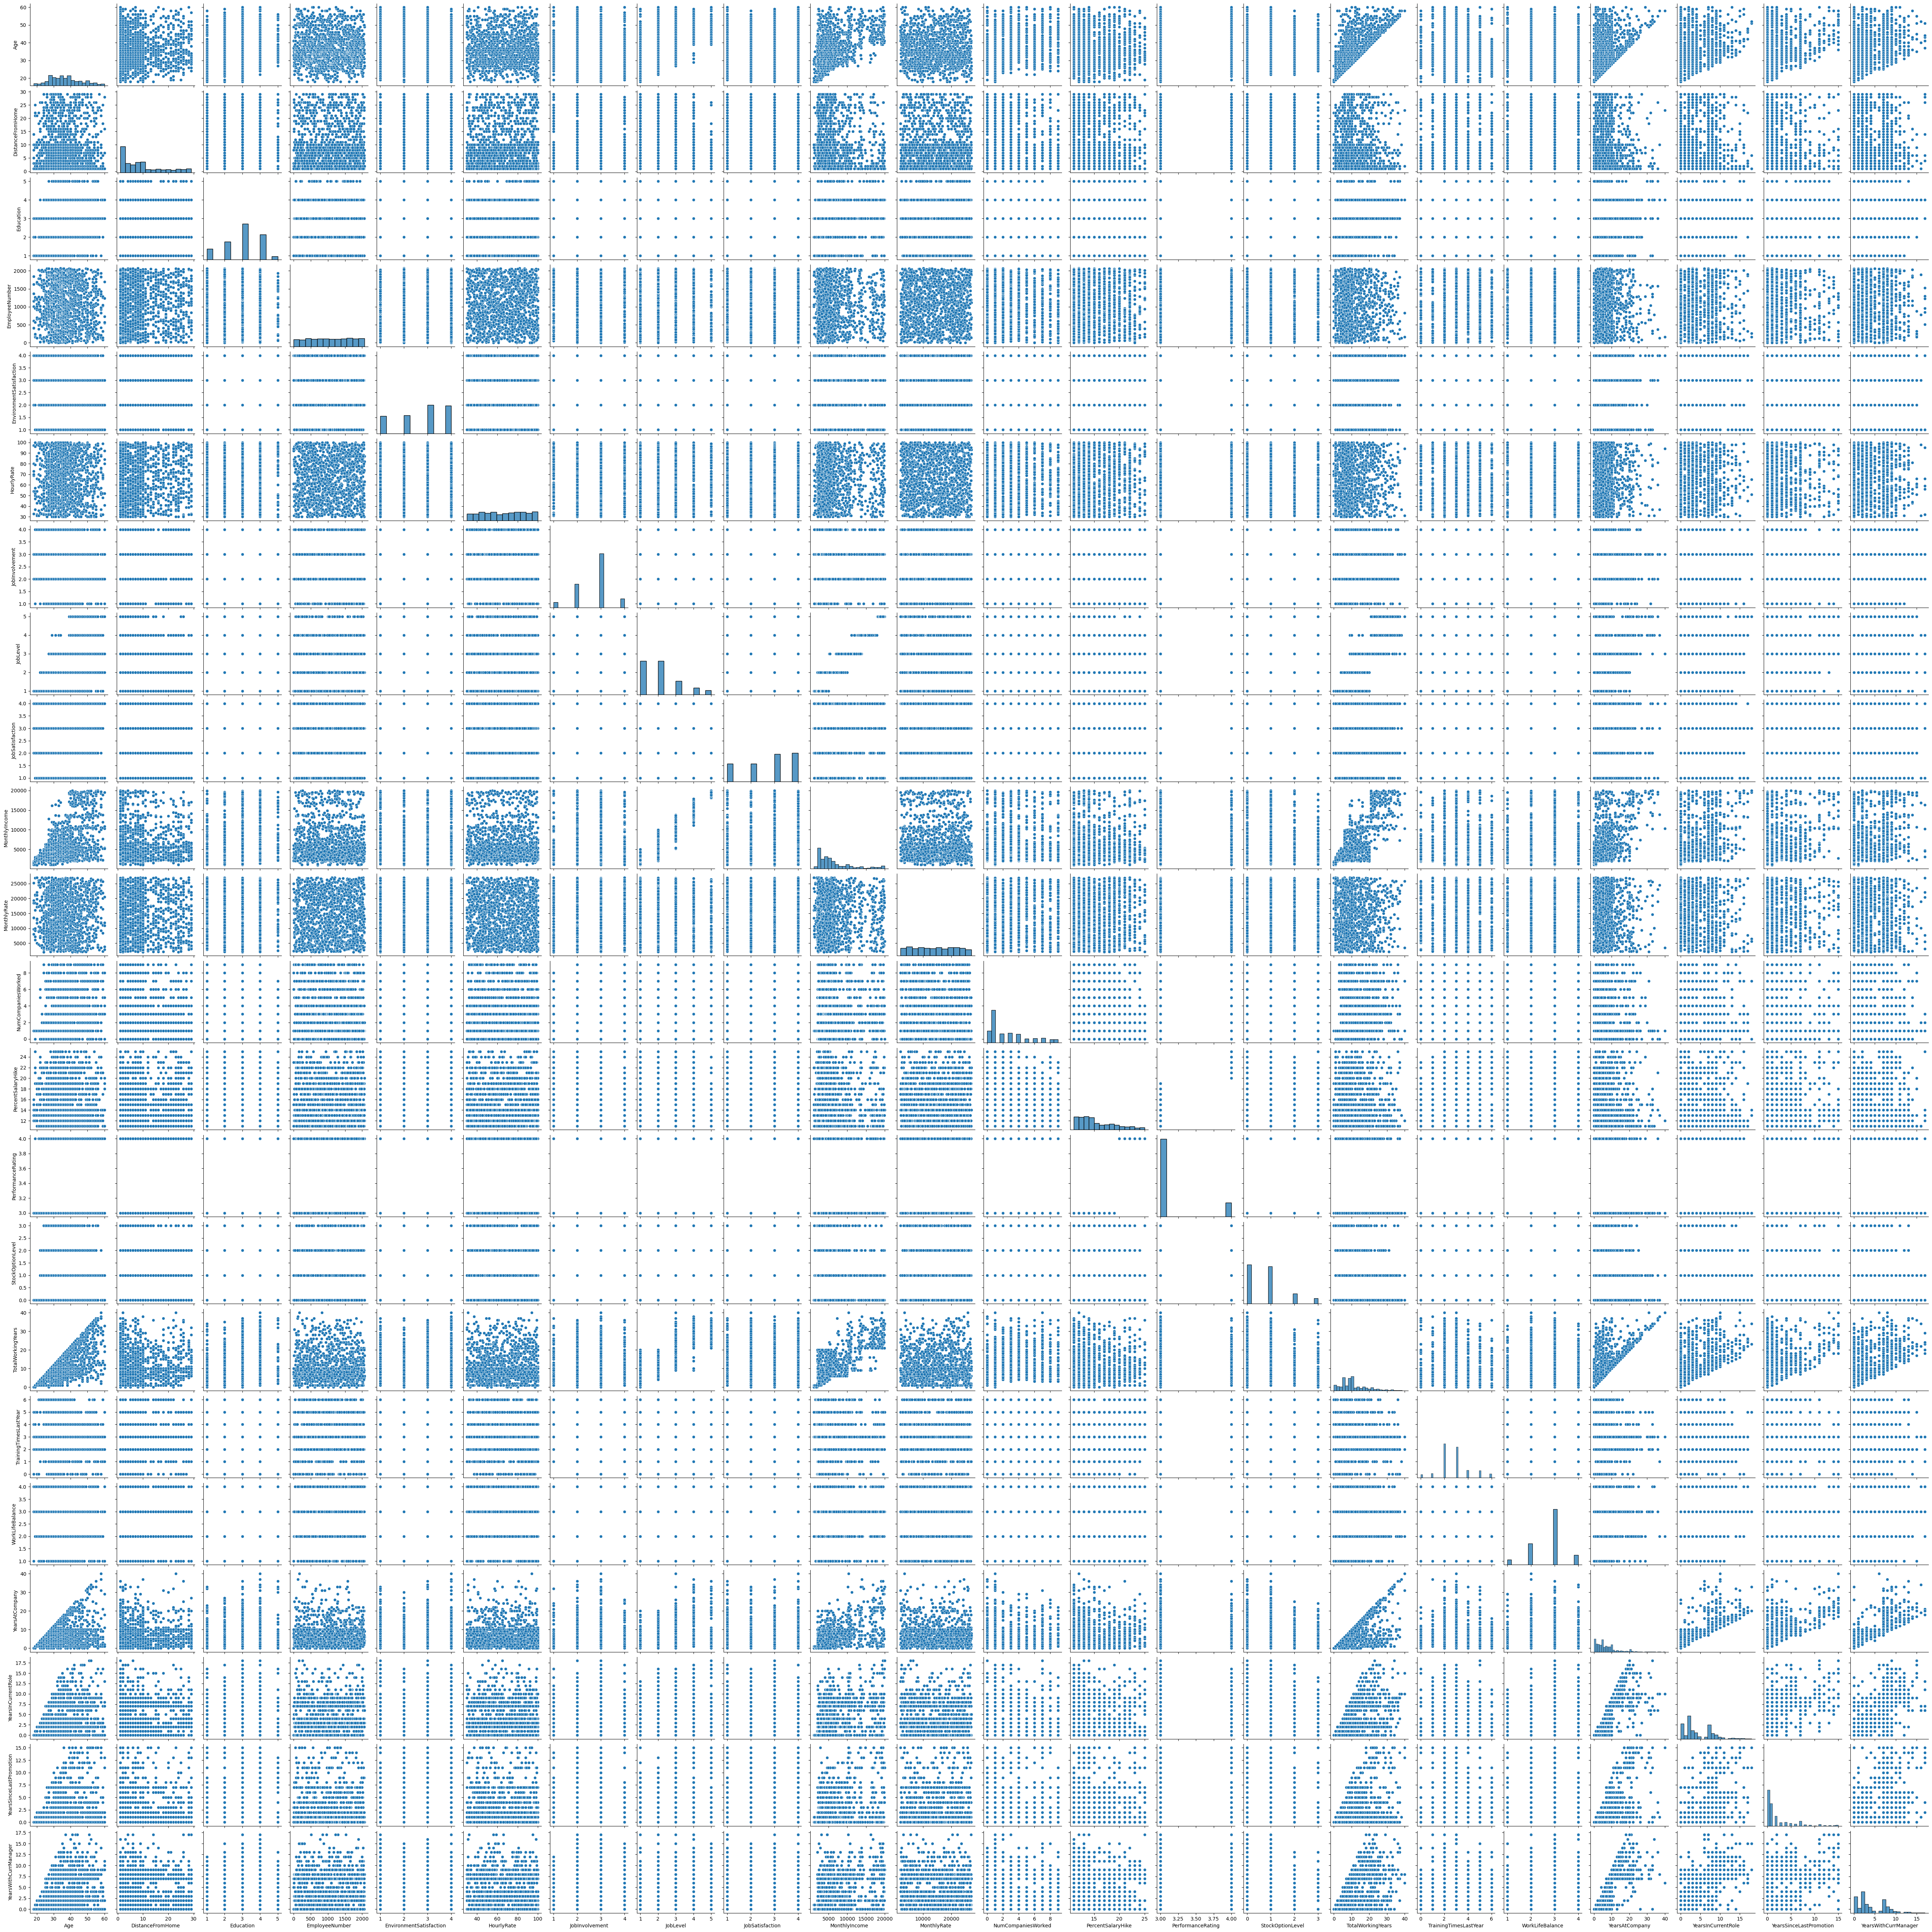

In [36]:
import seaborn as sns

sns.pairplot(hr_clean_df)



In [31]:
#normalize the data
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(hr_clean_df), columns=hr_clean_df.columns)

ValueError: could not convert string to float: '18-25'

In [18]:
#save the DataFrame to a CSV file. 
hr_clean_df.to_csv("Resources/HR_Analystics_clean", index=False)